# WeatherPy
----

#### Summary of Findings
* Weather data from the Open Weather Map website shows that Max Temperatures closer to the equator (latitdue closer to "0") tend to increase, meaning temperatures are hotter closer to the equator (see "City Latitude vs. Max Temperature" for results).

* Other weather patterns were less prominent in the data. That is to say that there does not appear to be a clear indication in the relationship between Humidity, Wind Speed, and much less for Cloudiness.  

* Future research may be done to find more prominent patterns in the latter results, for example, perhaps look at coastal cities vs. inland cities in relation to Latitude, Humidity and Wind Speed.

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
import random
import json

# Import API key
from api_keys import api_key

#http://api.openweathermap.org/data/2.5/forecast?id={geo_id}&APPID={api_keys.py}

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Setting the url for weather api for cities by geographic coordinates
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&APPID={api_keys.py}"

## Generate Cities List

In [99]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#lngs
len(cities)


645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
# Performing weather check on cities using series of successive API calls


baseurl = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("-----------------------------")

#print(f"Processing Record: {lat_lngs[cities]}")

# Get one of the posts
Row=[]
set_count = 1
record_count = 1
for city in cities:
    # Build query URL
    url = baseurl + "appid=" + api_key + "&q=" + city + "&units=imperial"
    response = requests.get(url).json()
    try:
        Row.append([response["name"],response["clouds"]['all'],response["sys"]['country'],response["dt"],response["main"]["humidity"],response["coord"]["lat"],response["coord"]["lon"],response["main"]["temp_max"],response["wind"]["speed"]])
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        if ((record_count ==50)&(set_count==1)) or ((record_count==49)&(set_count!=1)):
              record_count =0
              set_count +=1
        else: record_count +=1
    except KeyError:
        print('City not found. Skipping...')  
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | kachiry
Processing Record 3 of Set 1 | srednekolymsk
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | uvelskiy
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | dwarka
Processing Record 9 of Set 1 | abu dhabi
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | pochutla
Processing Record 12 of Set 1 | lebu
City not found. Skipping...
Processing Record 13 of Set 1 | saint-leu
Processing Record 14 of Set 1 | pakxe
Processing Record 15 of Set 1 | talnakh
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | umm lajj
Processing Record 17 of Set 1 | magway
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | witu
Processing Record 21 of Set 1 | winsum
Processing Record 22 o

Processing Record 35 of Set 4 | tiksi
Processing Record 36 of Set 4 | viedma
Processing Record 37 of Set 4 | chokurdakh
Processing Record 38 of Set 4 | izazi
Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | paracuru
City not found. Skipping...
Processing Record 42 of Set 4 | sierra vista
Processing Record 43 of Set 4 | chalus
Processing Record 44 of Set 4 | noumea
Processing Record 45 of Set 4 | port hawkesbury
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | vigia
Processing Record 49 of Set 4 | nokaneng
Processing Record 0 of Set 5 | tapejara
Processing Record 1 of Set 5 | batagay
Processing Record 2 of Set 5 | anito
Processing Record 3 of Set 5 | comodoro rivadavia
City not found. Skipping...
Processing Record 4 of Set 5 | kamien pomorski
Processing Record 5 of Set 5 | lagoa
Processing Record 6 of Set 5 | vallenar
Processing Record 7 of Set 5 | deep rive

Processing Record 15 of Set 8 | le port
Processing Record 16 of Set 8 | qaqortoq
Processing Record 17 of Set 8 | buin
Processing Record 18 of Set 8 | gazanjyk
City not found. Skipping...
Processing Record 19 of Set 8 | luderitz
Processing Record 20 of Set 8 | sao jose de ribamar
Processing Record 21 of Set 8 | buala
Processing Record 22 of Set 8 | abnub
Processing Record 23 of Set 8 | camabatela
Processing Record 24 of Set 8 | angoche
Processing Record 25 of Set 8 | novobelokatay
Processing Record 26 of Set 8 | davila
Processing Record 27 of Set 8 | maceio
Processing Record 28 of Set 8 | bara
Processing Record 29 of Set 8 | nynashamn
Processing Record 30 of Set 8 | orocue
Processing Record 31 of Set 8 | agirish
Processing Record 32 of Set 8 | rapid valley
Processing Record 33 of Set 8 | asyut
Processing Record 34 of Set 8 | vilyuysk
Processing Record 35 of Set 8 | qeshm
Processing Record 36 of Set 8 | acapulco
Processing Record 37 of Set 8 | san juan
Processing Record 38 of Set 8 | neu

Processing Record 2 of Set 12 | road town
Processing Record 3 of Set 12 | freeport
Processing Record 4 of Set 12 | molde
Processing Record 5 of Set 12 | luba
Processing Record 6 of Set 12 | mantua
Processing Record 7 of Set 12 | luau
Processing Record 8 of Set 12 | wuwei
Processing Record 9 of Set 12 | miles city
Processing Record 10 of Set 12 | luwuk
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 12 | putina
Processing Record 12 of Set 12 | sorata
Processing Record 13 of Set 12 | gidam
Processing Record 14 of Set 12 | kyshtovka
Processing Record 15 of Set 12 | westport
Processing Record 16 of Set 12 | ati
Processing Record 17 of Set 12 | olinda
Processing Record 18 of Set 12 | athabasca
Processing Record 19 of Set 12 | newport
City not found. Skipping...
Processing Record 20 of Set 12 | giyani
Processing Record 21 of Set 12 | shanghai
Processing Record 22 of Set 12 | barsuki
Processing Record 23 of Set 12 | shahreza
Proc

In [101]:
df =pd.DataFrame(Row,columns=("City", "Cloudiness", "Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"))
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avera,1,US,1563660458,49,33.19,-82.53,93.20,5.82
1,Kachiry,3,KZ,1563660458,77,53.07,76.10,66.76,5.01
2,Srednekolymsk,100,RU,1563660459,52,67.46,153.71,51.64,11.45
3,Kapaa,90,US,1563660459,66,22.08,-159.32,86.00,12.75
4,Uvelskiy,100,RU,1563660459,93,54.44,61.36,66.04,11.83


In [103]:
df.to_csv(output_data_file)
df.shape

(578, 9)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

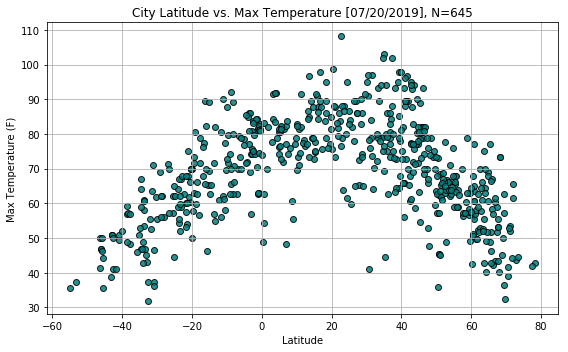

In [138]:
fig,temp = plt.subplots(figsize = (8,5))
temp.scatter(x=df["Lat"],y=df["Max Temp"],facecolor ="teal",edgecolor="k",alpha = 0.85,linewidth =1)
date =time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature [{date}], N=645")
temp.set_xlabel("Latitude")
temp.set_ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()
plt.savefig("../Images/temp_lat.png")
plt.show()

#### Latitude vs. Humidity Plot

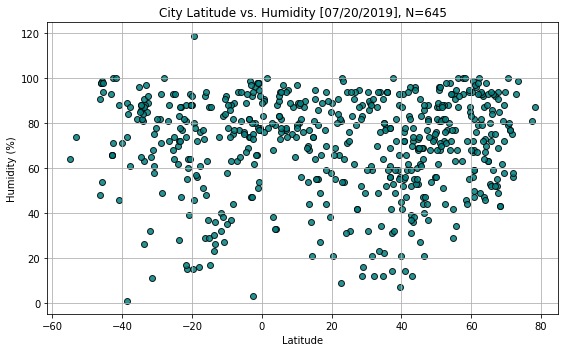

In [141]:
fig,humid = plt.subplots(figsize = (8,5))
humid.scatter(x=df["Lat"],y=df["Humidity"],facecolor ="teal",edgecolor="k",alpha = 0.85,linewidth =1)
date =time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity [{date}], N=645")
humid.set_xlabel("Latitude")
humid.set_ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()
plt.savefig("../Images/humid_lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

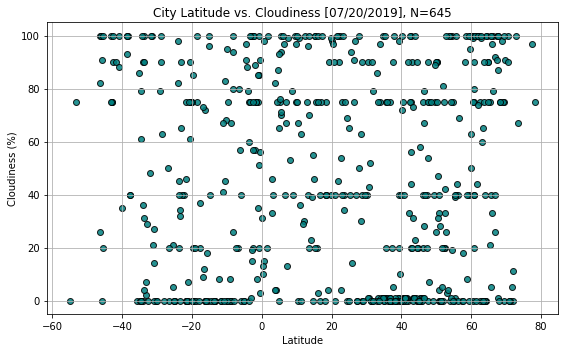

In [142]:
fig,cloud = plt.subplots(figsize = (8,5))
cloud.scatter(x=df["Lat"],y=df["Cloudiness"],facecolor ="teal",edgecolor="k",alpha = 0.85,linewidth =1)
date =time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness [{date}], N=645")
cloud.set_xlabel("Latitude")
cloud.set_ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
plt.savefig("../Images/cloud_lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

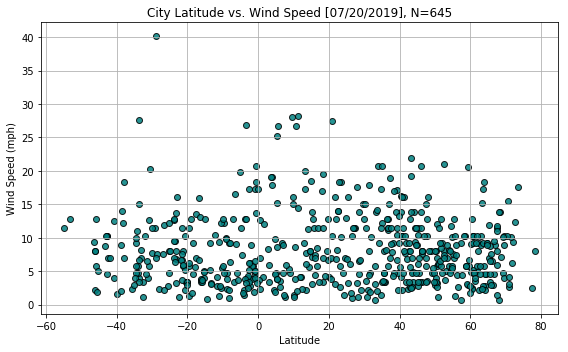

In [143]:
fig,wind = plt.subplots(figsize = (8,5))
wind.scatter(x=df["Lat"],y=df["Wind Speed"],facecolor ="teal",edgecolor="k",alpha = 0.85,linewidth =1)
date =time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed [{date}], N=645")
wind.set_xlabel("Latitude")
wind.set_ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()
plt.savefig("../Images/wind_lat.png")
plt.show()